In [37]:
import os
import glob as glob
import timecorr as tc
import hypertools as hyp
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import timecorr as tc
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine, vec2mat


datadir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'data')


figdir = '../../figs/method'
if not os.path.exists(figdir):
    os.mkdir(figdir)

pieman_data = loadmat(os.path.join(datadir, 'pieman_ica100.mat'))
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

debug = False

if debug:
    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0][:2000,:100], np.arange(4)))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

else:

    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0], np.arange(pieman_data[c].shape[1])))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

cfun = isfc 
rfun = 'PCA'
width = 5 
wp = 'mexican_hat'
cond = 'intact'
weights_fun=weights_paramter['weights']
weights_params=weights_paramter['params']
combine = corrmean_combine

mexican_hat = {'name': 'Mexican hat', 'weights': tc.mexican_hat_weights, 'params': {'sigma': width}}
weights_paramter = eval(wp)



In [ ]:
cond_data = data[conds == cond]

In [ ]:

level_1_corrs = np.asarray(tc.timecorr(cond_data, cfun=cfun, rfun=None, combine=combine,
                                                 weights_function=weights_fun, weights_params=weights_params))

level_1_corrs_mat = vec2mat(level_1_corrs)

level_1_approx = np.asarray(tc.timecorr(cond_data, cfun=cfun, rfun=rfun, combine=combine,
                                                 weights_function=weights_fun, weights_params=weights_params))


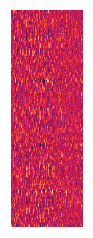

In [62]:
sns.heatmap(cond_data, xticklabels = False, yticklabels=False, cbar=False, square=True)

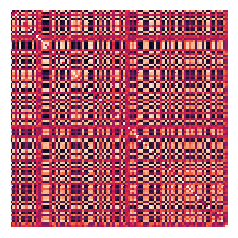

In [63]:
sns.heatmap(level_1_corrs_mat[:, :, 10], xticklabels = False, yticklabels=False, cbar=False, square=True)

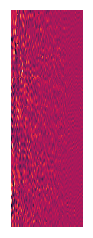

In [64]:
sns.heatmap(level_1_approx, xticklabels = False, yticklabels=False, cbar=False, square=True)

In [61]:
level_2_corrs = np.asarray(tc.timecorr(level_1_approx, cfun=cfun, rfun=None, combine=combine,
                                                 weights_function=weights_fun, weights_params=weights_params))

level_2_corrs_mat = vec2mat(level_2_corrs)

level_2_approx = np.asarray(tc.timecorr(level_1_approx, cfun=cfun, rfun=rfun, combine=combine,
                                                 weights_function=weights_fun, weights_params=weights_params))


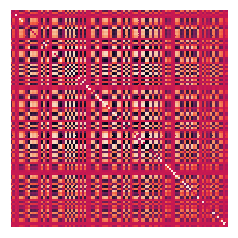

In [72]:
sns.heatmap(level_2_corrs_mat[:, :, 100], xticklabels = False, yticklabels=False, cbar=False, square=True)

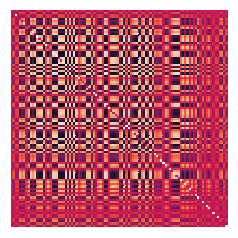

In [73]:
sns.heatmap(level_2_corrs_mat[:, :, 102], xticklabels = False, yticklabels=False, cbar=False, square=True)

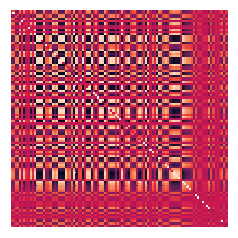

In [74]:
sns.heatmap(level_2_corrs_mat[:, :, 10], xticklabels = False, yticklabels=False, cbar=False, square=True)

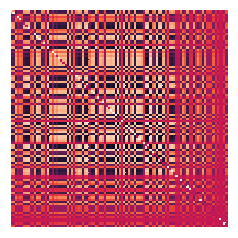

In [75]:
sns.heatmap(level_2_corrs_mat[:, :, 108], xticklabels = False, yticklabels=False, cbar=False, square=True)

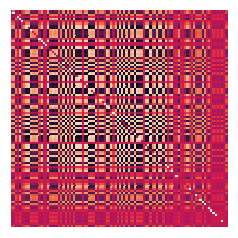

In [76]:
sns.heatmap(level_2_corrs_mat[:, :, 110], xticklabels = False, yticklabels=False, cbar=False, square=True)

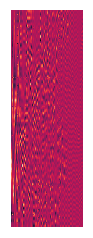

In [77]:
sns.heatmap(level_2_approx, xticklabels = False, yticklabels=False, cbar=False, square=True)